In [851]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PowerTransformer
from sklearn.compose import ColumnTransformer 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_diabetes
from sklearn.datasets import make_classification
import os
import seaborn as sns
import scipy.stats as stats

In [793]:
df1=pd.read_csv("C:/Numpy Ass/training_set_features.csv")
tf=pd.read_csv("C:/Numpy Ass/training_set_labels.csv")
# tf.drop(['respondent_id'],axis=1,inplace=True)
tt1=pd.read_csv("C:/Numpy Ass/test_set_features.csv")
tt=tt1.merge(tf)
df=df1.merge(tf)

In [794]:
tt.shape

(0, 38)

In [795]:
cleanup_nums = {"income_poverty": {"<= $75,000, Above Poverty":"Above Poverty", "> $75,000":"Avg"},
                "marital_status": {"Married":1,"Not Married":0},
                "rent_or_own":    {"Own":1,"Rent":0}}
df = df.replace(cleanup_nums)


df['xyz_knowledge']=df['xyz_knowledge'].fillna(1)
df['xyz_concern']=df['xyz_concern'].fillna(2)
df['behavioral_antiviral_meds']=df['behavioral_antiviral_meds'].fillna(0)
df['behavioral_avoidance']=df['behavioral_avoidance'].fillna(1)
df['behavioral_face_mask']=df['behavioral_face_mask'].fillna(0)
df['behavioral_wash_hands']=df['behavioral_wash_hands'].fillna(1)
df['behavioral_large_gatherings']=df['behavioral_large_gatherings'].fillna(0)
df['behavioral_outside_home']=df['behavioral_outside_home'].fillna(0)
df['behavioral_touch_face']=df['behavioral_touch_face'].fillna(1)
df['chronic_med_condition']=df['chronic_med_condition'].fillna(0)
df['child_under_6_months']=df['child_under_6_months'].fillna(0)
df['health_worker']=df['health_worker'].fillna(0)
df['household_children']=df['household_children'].fillna(0)
df['doctor_recc_xyz']=df['doctor_recc_xyz'].fillna(0)
df['doctor_recc_seasonal']=df['doctor_recc_seasonal'].fillna(0)
df['rent_or_own']=df['rent_or_own'].fillna(1)
df['opinion_xyz_vacc_effective']=df['opinion_xyz_vacc_effective'].fillna(4)
df['opinion_seas_vacc_effective']=df['opinion_seas_vacc_effective'].fillna(4)
df['opinion_seas_sick_from_vacc']=df['opinion_seas_sick_from_vacc'].fillna(1)
df['opinion_xyz_risk']=df['opinion_xyz_risk'].fillna(2)
df['opinion_xyz_sick_from_vacc']=df['opinion_xyz_sick_from_vacc'].fillna(2)
df['household_adults']=df['household_adults'].fillna(1)
df['income_poverty']=df['income_poverty'].fillna("Missing")
# df['opinion_seas_risk']=df['opinion_seas_risk'].fillna(2)


df.drop(['employment_industry','employment_occupation','health_insurance'],axis=1,inplace=True)
df.dropna(subset=['opinion_seas_risk'],inplace=True)


df=pd.get_dummies(df,columns=['income_poverty'],dtype=int,sparse=False,drop_first=True)
df=pd.get_dummies(df,columns=['sex'],dtype=int,sparse=False,drop_first=True)
df=pd.get_dummies(df,columns=['census_msa'],dtype=int,sparse=False,drop_first=True)
df=pd.get_dummies(df,columns=['age_group'],dtype=int,sparse=False,drop_first=True)
# df=pd.get_dummies(df,columns=['employment_status'],dtype=int,sparse=False,drop_first=True)


counts=df['race'].value_counts()
repl=counts[counts<=10000].index
df['race']=pd.get_dummies(df['race'].replace(repl,'Others'),dtype=int,sparse=False,drop_first=True)

C:\Users\MEENAKSHI\AppData\Local\Temp\ipykernel_16116\589078141.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace(cleanup_nums)


In [796]:
# cleanup_nums = {"income_poverty": {"<= $75,000, Above Poverty":"Above Poverty", "> $75,000":"Avg"},
#                 "marital_status": {"Married":1,"Not Married":0},
#                 "rent_or_own":    {"Own":1,"Rent":0}}
# tt = tt.replace(cleanup_nums)


# tt['xyz_knowledge']=tt['xyz_knowledge'].fillna(1)
# tt['xyz_concern']=tt['xyz_concern'].fillna(2)
# tt['behavioral_antiviral_meds']=tt['behavioral_antiviral_meds'].fillna(0)
# tt['behavioral_avoidance']=tt['behavioral_avoidance'].fillna(1)
# tt['behavioral_face_mask']=tt['behavioral_face_mask'].fillna(0)
# tt['behavioral_wash_hands']=tt['behavioral_wash_hands'].fillna(1)
# tt['behavioral_large_gatherings']=tt['behavioral_large_gatherings'].fillna(0)
# tt['behavioral_outside_home']=tt['behavioral_outside_home'].fillna(0)
# tt['behavioral_touch_face']=tt['behavioral_touch_face'].fillna(1)
# tt['chronic_med_condition']=tt['chronic_med_condition'].fillna(0)
# tt['child_under_6_months']=tt['child_under_6_months'].fillna(0)
# tt['health_worker']=tt['health_worker'].fillna(0)
# tt['household_children']=tt['household_children'].fillna(0)
# tt['doctor_recc_xyz']=tt['doctor_recc_xyz'].fillna(0)
# tt['doctor_recc_seasonal']=tt['doctor_recc_seasonal'].fillna(0)
# tt['rent_or_own']=tt['rent_or_own'].fillna(1)
# tt['opinion_xyz_vacc_effective']=tt['opinion_xyz_vacc_effective'].fillna(4)
# tt['opinion_seas_vacc_effective']=tt['opinion_seas_vacc_effective'].fillna(4)
# tt['opinion_seas_sick_from_vacc']=tt['opinion_seas_sick_from_vacc'].fillna(1)
# tt['opinion_xyz_risk']=tt['opinion_xyz_risk'].fillna(2)
# tt['opinion_xyz_sick_from_vacc']=tt['opinion_xyz_sick_from_vacc'].fillna(2)
# tt['household_adults']=tt['household_adults'].fillna(1)
# tt['income_poverty']=tt['income_poverty'].fillna("Missing")
# tt['opinion_seas_risk']=tt['opinion_seas_risk'].fillna(2)

# tt.drop(['employment_industry','employment_occupation','health_insurance'],axis=1,inplace=True)
# # tt.dropna(subset=['opinion_seas_risk'],inplace=True)


# tt=pd.get_dummies(tt,columns=['income_poverty'],dtype=int,sparse=False,drop_first=True)
# tt=pd.get_dummies(tt,columns=['sex'],dtype=int,sparse=False,drop_first=True)
# tt=pd.get_dummies(tt,columns=['census_msa'],dtype=int,sparse=False,drop_first=True)
# tt=pd.get_dummies(tt,columns=['age_group'],dtype=int,sparse=False,drop_first=True)
# # df=pd.get_dummies(df,columns=['employment_status'],dtype=int,sparse=False,drop_first=True)


# counts=tt['race'].value_counts()
# repl=counts[counts<=10000].index
# tt['race']=pd.get_dummies(tt['race'].replace(repl,'Others'),dtype=int,sparse=False,drop_first=True)

In [797]:
# oe=OrdinalEncoder(categories=[['College Graduate','Some College','12 Years','< 12 Years']])
# oe.fit(df['education'].values.reshape(26193,1))

In [801]:
# tt['opinion_seas_risk'].value_counts()

In [802]:
df.isnull().sum()

respondent_id                       0
xyz_concern                         0
xyz_knowledge                       0
behavioral_antiviral_meds           0
behavioral_avoidance                0
behavioral_face_mask                0
behavioral_wash_hands               0
behavioral_large_gatherings         0
behavioral_outside_home             0
behavioral_touch_face               0
doctor_recc_xyz                     0
doctor_recc_seasonal                0
chronic_med_condition               0
child_under_6_months                0
health_worker                       0
opinion_xyz_vacc_effective          0
opinion_xyz_risk                    0
opinion_xyz_sick_from_vacc          0
opinion_seas_vacc_effective         0
opinion_seas_risk                   0
opinion_seas_sick_from_vacc         0
education                         929
race                                0
marital_status                    928
rent_or_own                         0
employment_status                 982
hhs_geo_regi

In [803]:
df.shape

(26193, 41)

In [820]:
df['education'].value_counts()

education
College Graduate    10080
Some College         7037
12 Years             5789
< 12 Years           2358
Name: count, dtype: int64

In [821]:
tt.shape

(0, 38)

In [822]:
a=df.pop('education')
df.insert(40,a.name,a)

In [823]:
# g=tt.pop('education')
# tt.insert(37,g.name,g)

In [824]:
b=df.pop('employment_status')
df.insert(39,b.name,b)

In [825]:
# h=tt.pop('employment_status')
# tt.insert(36,h.name,h)

In [826]:
c=df.pop('marital_status')
df.insert(38,c.name,c)

In [827]:
# p=tt.pop('marital_status')
# tt.insert(35,p.name,p)

In [828]:
d=df.pop('xyz_vaccine')
df.insert(37,d.name,d)

In [829]:
# r=tt.pop('xyz_vaccine')
# tt.insert(37,r.name,r)

In [830]:
e=df.pop('seasonal_vaccine')
df.insert(36,e.name,e)

In [831]:
# u=tt.pop('seasonal_vaccine')
# tt.insert(36,u.name,u)

In [832]:
f=df.pop('hhs_geo_region')
df.insert(40,f.name,f)

In [833]:
# m=tt.pop('hhs_geo_region')
# tt.insert(,m.name,m)

In [818]:
df

,respondent_id,xyz_concern,xyz_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,age_group_35 - 44 Years,age_group_45 - 54 Years,age_group_55 - 64 Years,age_group_65+ Years,seasonal_vaccine,xyz_vaccine,marital_status,employment_status,education,hhs_geo_region
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,0,1,0,0,0,0.0,Not in Labor Force,< 12 Years,oxchjgsf
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1,0,0,0,1,0,0.0,Employed,12 Years,bhuqouqj
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0.0,Employed,College Graduate,qufhixun
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0,0,0,1,1,0,0.0,Not in Labor Force,12 Years,lrircsnp
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,1,0,0,0,0,1.0,Employed,Some College,qufhixun
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,1,0,0,0.0,Not in Labor Force,Some College,qufhixun
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0.0,Employed,College Graduate,lzgpxyit
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,0,0,1,0,1,0,0.0,NaN,Some College,lzgpxyit
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,0,0,1.0,Employed,Some College,lrircsnp


In [839]:
xtrain,xtest,ytrain,ytest=train_test_split(df.iloc[:,1:35],df.iloc[:,36:37],test_size=0.2,random_state=42)

In [858]:
lr=LinearRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)
r2_score(ytest,ypred)*100
# mean_squared_error(ytest,ypred)

25.832177182442738

In [873]:
rr=Ridge(alpha=0.1,max_iter=3000,solver='sag')
rr.fit(xtrain,ytrain)
ypred1=rr.predict(xtest)
r2_score(ytest,ypred1)*100


25.832205794420528

In [874]:
lor = LogisticRegression(penalty=None,solver='sag')
lor.fit(xtrain,ytrain)
ypred2=lor.predict(xtest)
r2_score(ytest,ypred)*100


C:\Users\MEENAKSHI\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


25.832177182442738

In [545]:
df['hhs_geo_region'].value_counts()

hhs_geo_region
lzgpxyit    4191
fpwskwrf    3192
qufhixun    3061
oxchjgsf    2810
kbazzjca    2802
bhuqouqj    2798
mlyzmhmf    2191
lrircsnp    2045
atmpeygn    2006
dqpwygqj    1097
Name: count, dtype: int64

In [315]:
df.iloc[:,0:10].isnull().sum()

respondent_id                  0
xyz_concern                    0
xyz_knowledge                  0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
dtype: int64

<Axes: >

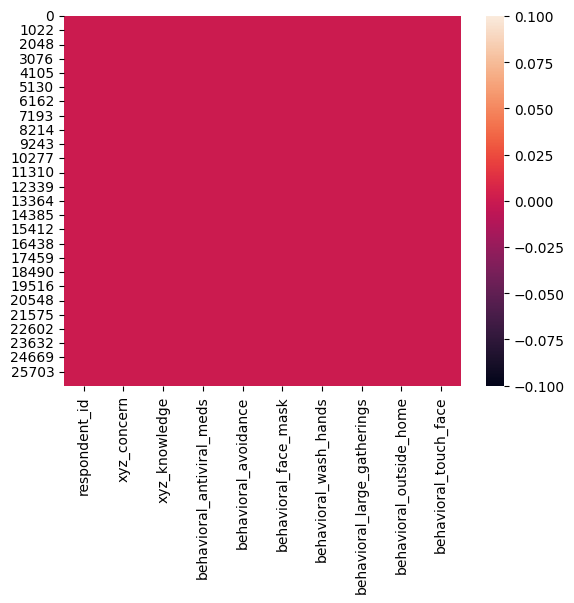

In [503]:
sns.heatmap(df.iloc[:,0:10].isnull())

<Axes: >

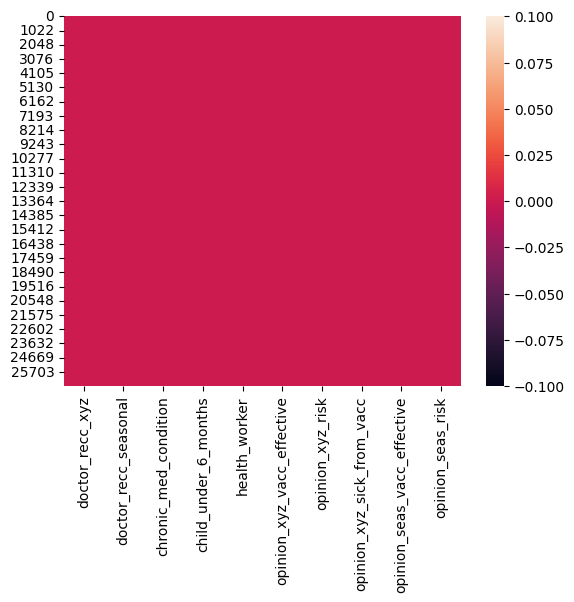

In [504]:
sns.heatmap(df.iloc[:,10:20].isnull())

<Axes: >

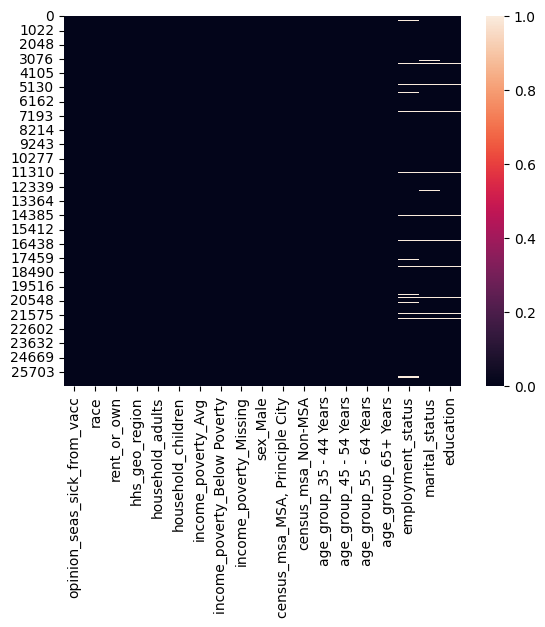

In [505]:
sns.heatmap(df.iloc[:,20:].isnull())